<a href="https://colab.research.google.com/github/NDBao08/ThucHanh4/blob/main/TH%E1%BB%B0C_H%C3%80NH_04_D%E1%BB%AE_LI%E1%BB%86U_TH%E1%BB%9CI_GIAN_V%E1%BB%9AI_T%E1%BA%A6N_S%E1%BB%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2251262580%8+1

5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file
file_path = "/content/vnindex_historical_Mar2015_Mar2023.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2000 non-null   object
 1   Change      2000 non-null   object
 2   Open        2000 non-null   object
 3   High        2000 non-null   object
 4   Low         2000 non-null   object
 5   Close       2000 non-null   object
 6   Volume      1998 non-null   object
 7   Value       2000 non-null   object
 8   Market_Cap  2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


(None,
          Date  Change      Open      High       Low     Close       Volume  \
 0  03/22/2023   0.79%  1,035.84  1,042.84  1,033.73  1,040.54  444,668,376   
 1  03/21/2023   0.91%  1,028.83  1,036.15  1,017.05  1,032.43  462,740,926   
 2  03/20/2023  -2.11%  1,041.91  1,042.60  1,022.71  1,023.10  549,282,333   
 3  03/17/2023  -0.22%  1,053.37  1,055.42  1,043.54  1,045.14  551,870,757   
 4  03/16/2023  -1.39%  1,056.15  1,058.73  1,043.65  1,047.40  519,667,677   
 
        Value    Market_Cap  
 0   8,642.44  4,182,138.46  
 1   8,318.91  4,149,629.98  
 2   9,747.71  4,112,287.24  
 3  10,285.29  4,200,705.49  
 4   9,397.81  4,209,671.79  )

In [3]:
# Bước 1: Chuyển cột 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Bước 2: Đảo ngược thứ tự dữ liệu (từ cũ -> mới)
df = df.sort_values('Date').reset_index(drop=True)

# Bước 3: Chuyển các cột số từ chuỗi sang kiểu float
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Value', 'Market_Cap']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Bước 4: Giữ lại các cột cần thiết cho phân tích
df_cleaned = df[['Date', 'Close']].copy()

# Hiển thị vài dòng đầu sau khi làm sạch
df_cleaned.head()

,Date,Close
0,2015-03-26,556.16
1,2015-03-27,551.42
2,2015-03-30,545.19
3,2015-03-31,551.13
4,2015-04-01,538.91


In [4]:
import pandas as pd

# Đảm bảo dữ liệu chỉ chứa cột 'Date' và 'Close' hợp lệ
df_cleaned = df[['Date', 'Close']].copy()
df_cleaned.dropna(inplace=True)

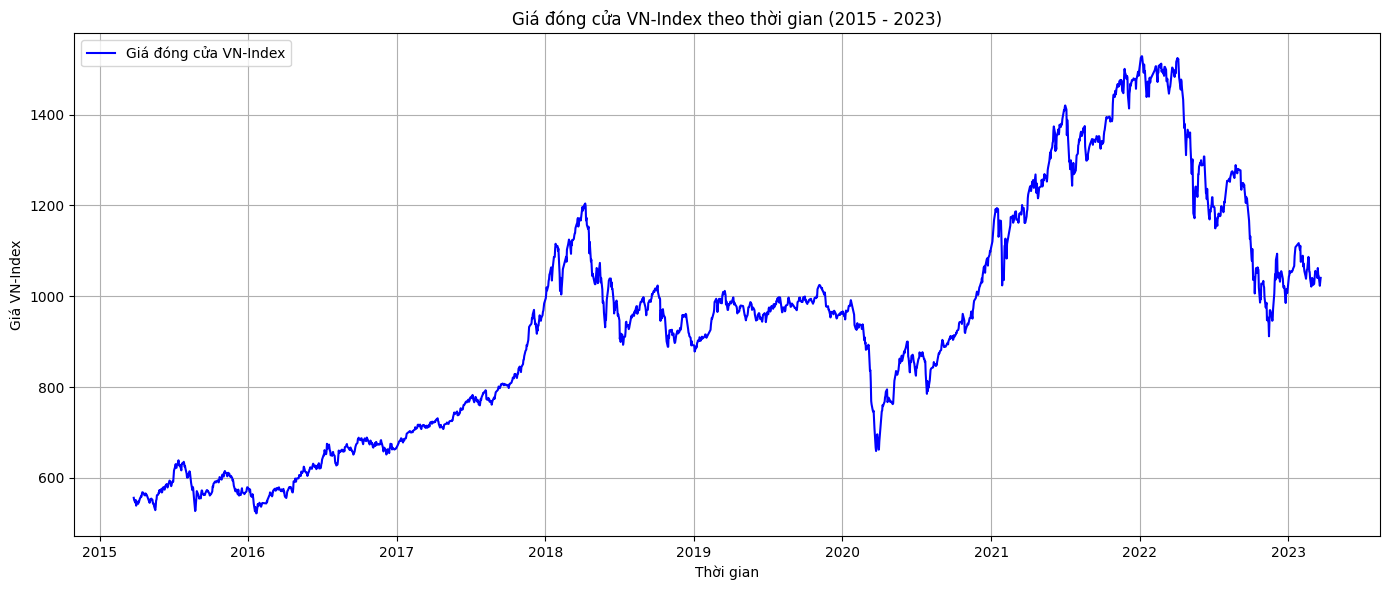

In [5]:
# Vẽ biểu đồ giá đóng cửa theo thời gian (trước khi FFT)
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], color='blue', label='Giá đóng cửa VN-Index')
plt.title('Giá đóng cửa VN-Index theo thời gian (2015 - 2023)')
plt.xlabel('Thời gian')
plt.ylabel('Giá VN-Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Phổ tần số

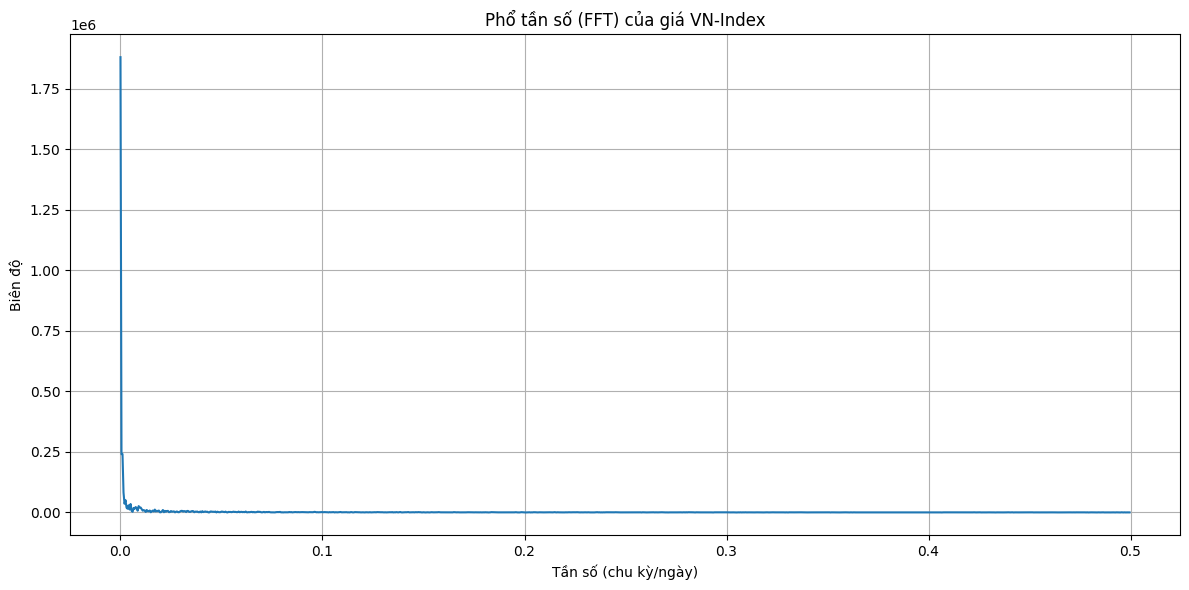

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Trích xuất giá đóng cửa
close_prices = df_cleaned['Close'].values
n = len(close_prices)

# Tính FFT và tần số
fft_values = fft(close_prices)
frequencies = fftfreq(n, d=1)  # d=1 giả định dữ liệu là daily

# Chỉ lấy nửa phổ do FFT đối xứng
half_n = n // 2
fft_magnitudes = np.abs(fft_values[:half_n])
frequencies = frequencies[:half_n]

# Biểu diễn phổ tần số
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_magnitudes)
plt.title("Phổ tần số (FFT) của giá VN-Index")
plt.xlabel("Tần số (chu kỳ/ngày)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from scipy.signal import find_peaks

# Tìm các đỉnh trong phổ FFT
peaks, _ = find_peaks(fft_magnitudes, height=np.max(fft_magnitudes) * 0.1)  # lấy các đỉnh đáng kể

# Tính chu kỳ tương ứng với các đỉnh tần số
peak_frequencies = frequencies[peaks]
peak_magnitudes = fft_magnitudes[peaks]
peak_periods = 1 / peak_frequencies

# Tạo bảng kết quả
fft_analysis_df = pd.DataFrame({
    'Frequency': peak_frequencies,
    'Magnitude': peak_magnitudes,
    'Period (days)': peak_periods
}).sort_values(by='Magnitude', ascending=False).reset_index(drop=True)

# Hiển thị các chu kỳ mạnh nhất
fft_analysis_df.head(10)

,Frequency,Magnitude,Period (days)
0,0.001,241365.867919,1000.0


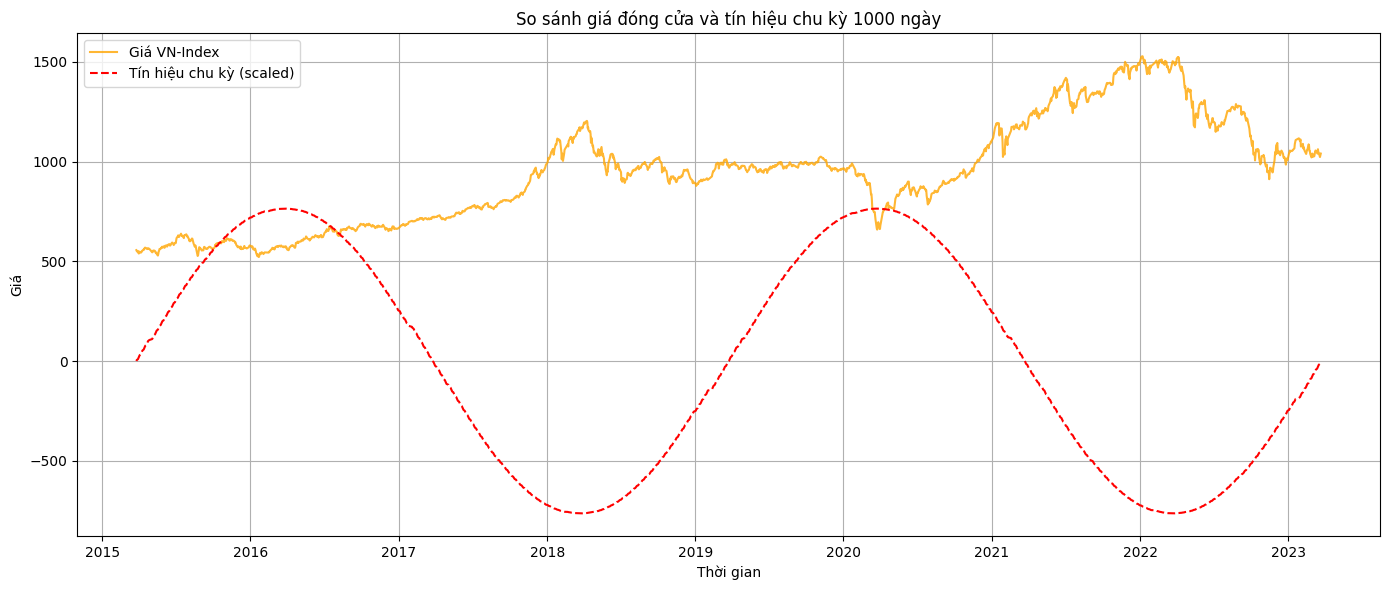

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn đã có df_cleaned với các cột: 'Date', 'Close'

# Tạo cột đếm ngày liên tục
df_cleaned['Day_Index'] = np.arange(len(df_cleaned))

# Chu kỳ chiếm ưu thế từ FFT
dominant_period = 1000  # hoặc lấy từ kết quả fft_analysis_df.loc[0, 'Period (days)']

# Tạo tín hiệu chu kỳ dạng sóng sinus
df_cleaned['Cycle_Signal'] = np.sin(2 * np.pi * df_cleaned['Day_Index'] / dominant_period)

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Giá VN-Index', color='orange', alpha=0.8)
plt.plot(df_cleaned['Date'], df_cleaned['Cycle_Signal'] * df_cleaned['Close'].max() * 0.5,
         label='Tín hiệu chu kỳ (scaled)', color='red', linestyle='--')
plt.title('So sánh giá đóng cửa và tín hiệu chu kỳ 1000 ngày')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gợi ý dựa trên giao dịch

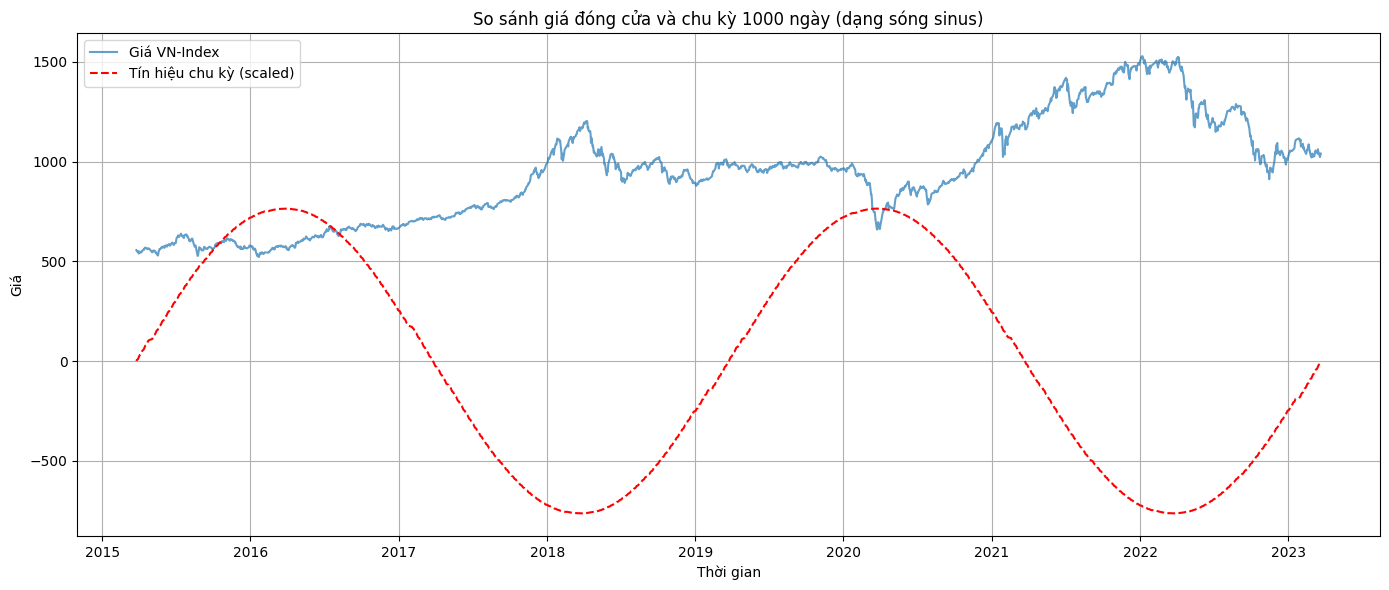

In [9]:
# Thêm cột số ngày kể từ đầu để làm trục X cho sóng sinus
df_cleaned['Day_Index'] = np.arange(len(df_cleaned))

# Chu kỳ mạnh nhất từ FFT
dominant_period = fft_analysis_df.loc[0, 'Period (days)']

# Tạo tín hiệu chu kỳ dạng sóng sinus
sin_wave = np.sin(2 * np.pi * df_cleaned['Day_Index'] / dominant_period)

# Thêm sóng chu kỳ vào dataframe để so sánh
df_cleaned['Cycle_Signal'] = sin_wave

# Vẽ biểu đồ so sánh giá và chu kỳ
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Giá VN-Index', alpha=0.7)
plt.plot(df_cleaned['Date'], df_cleaned['Cycle_Signal'] * df_cleaned['Close'].max() * 0.5,
         label='Tín hiệu chu kỳ (scaled)', color='red', linestyle='--')
plt.title('So sánh giá đóng cửa và chu kỳ 1000 ngày (dạng sóng sinus)')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()